In [1]:
# Import our dependencies
import psycopg2
import pandas as pd
import matplotlib as plt
from matplotlib import pyplot as plt
import sklearn as skl
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report



In [2]:
# tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
# print(classification_report(y_true, y_pred))

In [3]:
# make dataframe from csv
bank_df = pd.read_csv("bank-full_2.csv")
bank_df.head()

,Unnamed: 0,index,age,job,marital,education,credit_default,balance,housing_loan,personal_loan,contact,duration_sec,campaign,pdays,previous,poutcome,subscription,date,weekday
0,0,0,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,-1,0,unknown,no,2008-05-05,Monday
1,1,1,44,technician,single,secondary,no,29,yes,no,unknown,151,1,-1,0,unknown,no,2008-05-05,Monday
2,2,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,-1,0,unknown,no,2008-05-05,Monday
3,3,3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,92,1,-1,0,unknown,no,2008-05-05,Monday
4,4,4,33,unknown,single,unknown,no,1,no,no,unknown,198,1,-1,0,unknown,no,2008-05-05,Monday


In [4]:
bank_df.isnull().values.any()

False

In [5]:
print(f"Duplicate entries: {bank_df.duplicated().sum()}")

Duplicate entries: 0


In [6]:
bank_df.drop(['index', 'pdays','previous','poutcome'],axis=1, inplace=True)

In [7]:
bank_list=[]
bank_list=list(bank_df.select_dtypes(include=['object']).columns)
bank_list

['job',
 'marital',
 'education',
 'credit_default',
 'housing_loan',
 'personal_loan',
 'contact',
 'subscription',
 'date',
 'weekday']

In [8]:
thing =bank_df[bank_list].nunique()
thing

job                12
marital             3
education           4
credit_default      2
housing_loan        2
personal_loan       2
contact             3
subscription        2
date              561
weekday             7
dtype: int64

In [9]:
bank_list_binary = ['credit_default','housing_loan','personal_loan','subscription']


In [10]:
# changing data type of binary choices from object to bool
for x in bank_list_binary:
    bank_df[x]=bank_df[x]=="yes"
bank_df[bank_list].nunique()

job                12
marital             3
education           4
credit_default      2
housing_loan        2
personal_loan       2
contact             3
subscription        2
date              561
weekday             7
dtype: int64

In [11]:
# change date to datetime format
bank_df['date']=pd.to_datetime(bank_df['date'])

# create data
dates = bank_df['date']

# calculate unix datetime
bank_df['date']=(dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')


bank_df.dtypes


Unnamed: 0         int64
age                int64
job               object
marital           object
education         object
credit_default      bool
balance            int64
housing_loan        bool
personal_loan       bool
contact           object
duration_sec       int64
campaign           int64
subscription        bool
date               int64
weekday           object
dtype: object

propbaly should run factoranalysis.
or dimensionality reductions via principal componet analysis.

In [12]:
bank_list=[]
bank_list=list(bank_df.select_dtypes(include=['object','category']).columns)
bank_list

['job', 'marital', 'education', 'contact', 'weekday']

In [13]:
bank_df[bank_list].nunique()

job          12
marital       3
education     4
contact       3
weekday       7
dtype: int64

In [14]:
# Create the OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(bank_df[bank_list]))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(bank_list)
encode_df.head()

c:\Users\rab_b\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,contact_cellular,contact_telephone,contact_unknown,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# Merge the two DataFrames together and drop the Country column
bank_df=bank_df.merge(encode_df,left_index=True,right_index=True).drop(bank_list,1)


C:\Users\rab_b\AppData\Local\Temp\ipykernel_22272\2310923932.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  bank_df=bank_df.merge(encode_df,left_index=True,right_index=True).drop(bank_list,1)


In [16]:
bank_df.drop('Unnamed: 0',axis=1, inplace=True)
bank_df

,age,credit_default,balance,housing_loan,personal_loan,duration_sec,campaign,subscription,date,job_admin.,...,contact_cellular,contact_telephone,contact_unknown,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,58,False,2143,True,False,261,1,False,1209945600,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,44,False,29,True,False,151,1,False,1209945600,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,33,False,2,True,True,76,1,False,1209945600,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,47,False,1506,True,False,92,1,False,1209945600,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,33,False,1,False,False,198,1,False,1209945600,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,False,825,False,False,977,3,True,1289952000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
45207,71,False,1729,False,False,456,2,True,1289952000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
45208,72,False,5715,False,False,1127,5,True,1289952000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
45209,57,False,668,False,False,508,4,False,1289952000,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [17]:
bank_df.dtypes

age                      int64
credit_default            bool
balance                  int64
housing_loan              bool
personal_loan             bool
duration_sec             int64
campaign                 int64
subscription              bool
date                     int64
job_admin.             float64
job_blue-collar        float64
job_entrepreneur       float64
job_housemaid          float64
job_management         float64
job_retired            float64
job_self-employed      float64
job_services           float64
job_student            float64
job_technician         float64
job_unemployed         float64
job_unknown            float64
marital_divorced       float64
marital_married        float64
marital_single         float64
education_primary      float64
education_secondary    float64
education_tertiary     float64
education_unknown      float64
contact_cellular       float64
contact_telephone      float64
contact_unknown        float64
weekday_Friday         float64
weekday_

In [18]:
# set up data x and y
y = bank_df.subscription
X = bank_df.drop(columns="subscription")

In [19]:
# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [20]:
bank_df.subscription.value_counts()

False    39922
True      5289
Name: subscription, dtype: int64

In [21]:
# implement random oversampling
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

Counter(y_resampled)

Counter({False: 29924, True: 29924})

In [22]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_resampled)

# Scale the data
X_train_scaled = X_scaler.transform(X_resampled)
X_test_scaled = X_scaler.transform(X_test)

In [23]:
# Define the logistic regression model
log_classifier = LogisticRegression(solver="lbfgs",max_iter=100)

# Train the model
log_classifier.fit(X_train_scaled,y_resampled)

# Evaluate the model
y_pred_test = log_classifier.predict(X_test_scaled)
y_pred_train = log_classifier.predict(X_train_scaled)

print('Training set metrics:')
print('Accuracy:', accuracy_score(y_resampled, y_pred_train))
print('Precision:', precision_score(y_resampled, y_pred_train))
print('Recall:', recall_score(y_resampled, y_pred_train))

print('Test set metrics:')
print('Accuracy:', accuracy_score(y_test, y_pred_test)) 
print('Precision:', precision_score(y_test, y_pred_test)) 
print('Recall:', recall_score(y_test, y_pred_test)) 

Training set metrics:
Accuracy: 0.8444058280978479
Precision: 0.8487176016782838
Recall: 0.8382234995321481
Test set metrics:
Accuracy: 0.8442006546934442
Precision: 0.4132420091324201
Recall: 0.832183908045977


In [24]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(random_state=1, n_estimators=25).fit(X_train_scaled, y_resampled)
# Evaluate the model
y_pred_test = clf.predict(X_test_scaled)
y_pred_train = clf.predict(X_train_scaled)

# print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
# print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

print('Training set metrics:')
print('Accuracy:', accuracy_score(y_resampled, y_pred_train))
print('Precision:', precision_score(y_resampled, y_pred_train))
print('Recall:', recall_score(y_resampled, y_pred_train))

print('Test set metrics:')
print('Accuracy:', accuracy_score(y_test, y_pred_test)) 
print('Precision:', precision_score(y_test, y_pred_test)) 
print('Recall:', recall_score(y_test, y_pred_test)) 

Training set metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Test set metrics:
Accuracy: 0.8948066884897815
Precision: 0.5783783783783784
Recall: 0.32796934865900385


In [25]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=25, random_state=1)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_resampled)

# Evaluate the model
y_pred_test = rf_model.predict(X_test_scaled)
y_pred_train = rf_model.predict(X_train_scaled)


print('Training set metrics:')
print('Accuracy:', accuracy_score(y_resampled, y_pred_train))
print('Precision:', precision_score(y_resampled, y_pred_train))
print('Recall:', recall_score(y_resampled, y_pred_train))

print('Test set metrics:')
print('Accuracy:', accuracy_score(y_test, y_pred_test)) 
print('Precision:', precision_score(y_test, y_pred_test)) 
print('Recall:', recall_score(y_test, y_pred_test)) 

Training set metrics:
Accuracy: 0.9999164550193824
Precision: 0.9998329379531558
Recall: 1.0
Test set metrics:
Accuracy: 0.9038308413695479
Precision: 0.5817091454272864
Recall: 0.5946360153256705


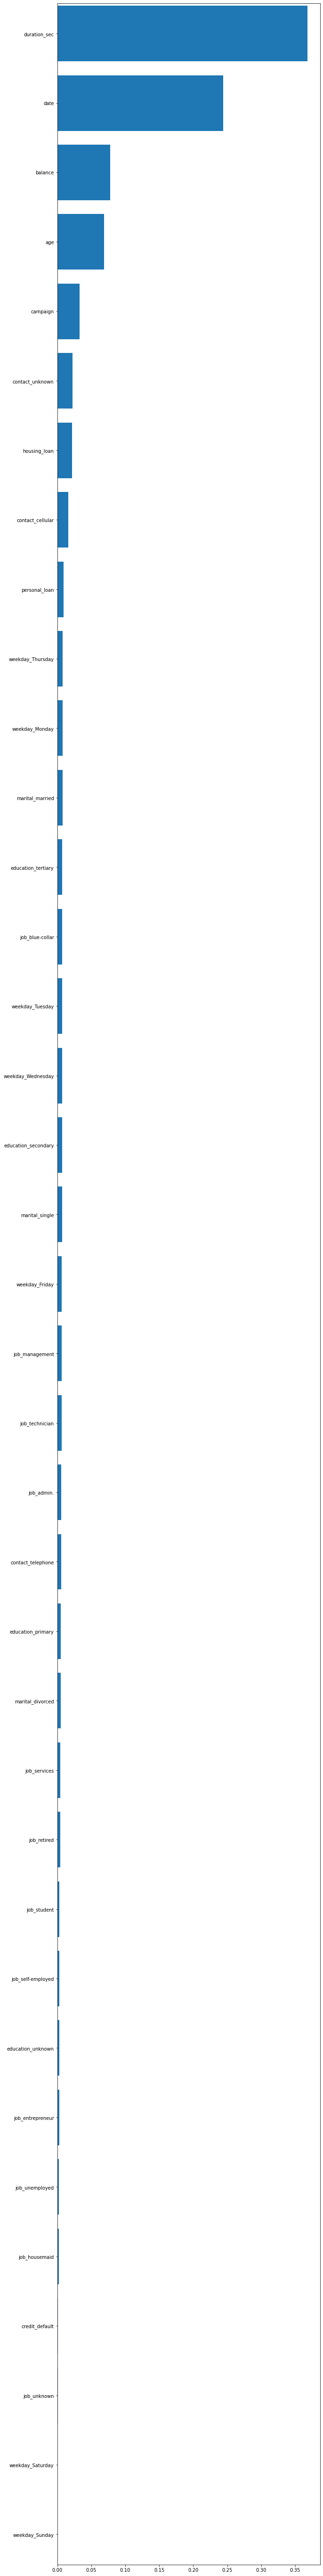

In [26]:
features = rf_model.feature_importances_
features = sorted(zip(X.columns, rf_model.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,100)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [27]:
# Create a random forest classifier.
knn_model = KNeighborsClassifier(n_neighbors=2, weights='uniform',leaf_size=15)

# Fitting the model
knn_model = knn_model.fit(X_train_scaled, y_resampled)

# Evaluate the model
y_pred_test = knn_model.predict(X_test_scaled)
y_pred_train = knn_model.predict(X_train_scaled)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
print(classification_report(y_test, y_pred_test))

print('Training set metrics:')
print('Accuracy:', accuracy_score(y_resampled, y_pred_train))
print('Precision:', precision_score(y_resampled, y_pred_train))
print('Recall:', recall_score(y_resampled, y_pred_train))

print('Test set metrics:')
print('Accuracy:', accuracy_score(y_test, y_pred_test)) 
print('Precision:', precision_score(y_test, y_pred_test)) 
print('Recall:', recall_score(y_test, y_pred_test)) 

              precision    recall  f1-score   support

       False       0.92      0.93      0.92      9998
        True       0.41      0.36      0.38      1305

    accuracy                           0.87     11303
   macro avg       0.66      0.65      0.65     11303
weighted avg       0.86      0.87      0.86     11303

Training set metrics:
Accuracy: 0.9999331640155059
Precision: 1.0
Recall: 0.9998663280310119
Test set metrics:
Accuracy: 0.866053260196408
Precision: 0.4095238095238095
Recall: 0.3624521072796935


In [28]:
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=32, activation="relu", input_dim=37))
nn_model.add(tf.keras.layers.Dense(units=32, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                1216      
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
_________________________________________________________________


In [29]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy", "Precision"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_resampled, epochs=200)

# Evaluate the model using the test data
model_loss, model_accuracy, model_precision = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
# model_precision = nn_model.metrics.Precision(X_test_scaled,y_test)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}, Precision: {model_precision}")
# print(model_precision)

Epoch 1/200
1871/1871 [==============================] - 2s 976us/step - loss: 0.3771 - accuracy: 0.8379 - precision: 0.8235
Epoch 2/200
1871/1871 [==============================] - 2s 952us/step - loss: 0.3305 - accuracy: 0.8609 - precision: 0.8341
Epoch 3/200
1871/1871 [==============================] - 2s 952us/step - loss: 0.3199 - accuracy: 0.8654 - precision: 0.8365
Epoch 4/200
1871/1871 [==============================] - 2s 961us/step - loss: 0.3108 - accuracy: 0.8699 - precision: 0.8392
Epoch 5/200
1871/1871 [==============================] - 2s 974us/step - loss: 0.3037 - accuracy: 0.8730 - precision: 0.8424
Epoch 6/200
1871/1871 [==============================] - 2s 947us/step - loss: 0.2969 - accuracy: 0.8757 - precision: 0.8436
Epoch 7/200
1871/1871 [==============================] - 2s 971us/step - loss: 0.2918 - accuracy: 0.8783 - precision: 0.8463
Epoch 8/200
1871/1871 [==============================] - 2s 971us/step - loss: 0.2869 - accuracy: 0.8817 - precision: 0.8490
